In [131]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

### GETTING HISTORIC DATA

In [2]:
asset = ['BTC-USD']

In [3]:
asset_data = yf.download(asset,start='2022-01-01')

[*********************100%***********************]  1 of 1 completed


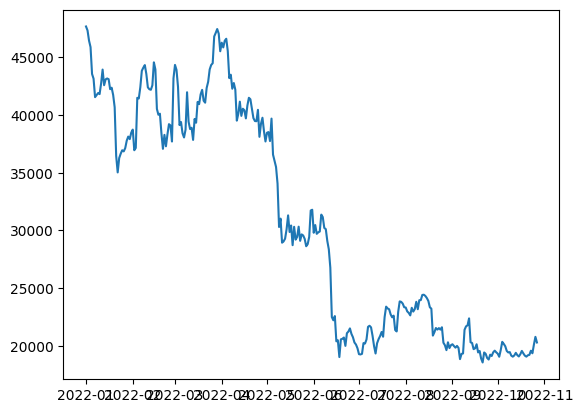

In [4]:
plt.plot(asset_data.Close)

In [132]:
def get_historic_price():
    """
    get historic price data via yahoo finance
    """
    
    asset = ['xrp-usd']
    asset_data = yf.download(asset,start='2020-01-01')
    return asset_data

In [204]:
df = get_historic_price()

[*********************100%***********************]  1 of 1 completed


In [134]:
df.index.astype(str)

Index(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05',
       '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
       ...
       '2022-10-19', '2022-10-20', '2022-10-21', '2022-10-22', '2022-10-23',
       '2022-10-24', '2022-10-25', '2022-10-26', '2022-10-27', '2022-10-28'],
      dtype='object', name='Date', length=1032)

In [205]:
df.columns = df.columns.str.lower()

In [136]:
df.shape

(1032, 6)

In [137]:
df.head()

,open,high,low,close,adj close,volume
Date,,,,,,
2020-01-01,0.192912,0.194362,0.192107,0.192667,0.192667,1041134003
2020-01-02,0.192708,0.192896,0.186947,0.188043,0.188043,1085351426
2020-01-03,0.187948,0.194070,0.185846,0.193521,0.193521,1270017043
2020-01-04,0.193521,0.194653,0.191835,0.194355,0.194355,999331594
2020-01-05,0.194367,0.199223,0.193884,0.195537,0.195537,1168067557


## visualization

#### we'll visual the price movement, trends and moving averages

 Why Use a Moving Average

    - A moving average helps cut down the amount of noise on a price chart. Look at the direction of the moving average to get a basic idea of which way the price is moving. If it is angled up, the price is moving up (or was recently) overall; angled down, and the price is moving down overall; moving sideways, and the price is likely in a range.

    - A moving average can also act as support or resistance. In an uptrend, a 50-day, 100-day, or 200-day moving average may act as a support level, as shown in the figure below. This is because the average acts like a floor (support), so the price bounces up off of it. In a downtrend, a moving average may act as resistance; like a ceiling, the price hits the level and then starts to drop again. 

In [206]:
df['test_date'] = df.index

In [207]:
df['test_date'] = pd.to_datetime(df.test_date)

In [208]:
df["day"] = df['test_date'].map(lambda x: x.day)
df["month"] = df['test_date'].map(lambda x: x.month)
df["year"] = df['test_date'].map(lambda x: x.year)

In [141]:
df

,open,high,low,close,adj close,volume,test_date,day,month,year
Date,,,,,,,,,,
2020-01-01,0.192912,0.194362,0.192107,0.192667,0.192667,1041134003,2020-01-01,1,1,2020
2020-01-02,0.192708,0.192896,0.186947,0.188043,0.188043,1085351426,2020-01-02,2,1,2020
2020-01-03,0.187948,0.194070,0.185846,0.193521,0.193521,1270017043,2020-01-03,3,1,2020
2020-01-04,0.193521,0.194653,0.191835,0.194355,0.194355,999331594,2020-01-04,4,1,2020
2020-01-05,0.194367,0.199223,0.193884,0.195537,0.195537,1168067557,2020-01-05,5,1,2020
...,...,...,...,...,...,...,...,...,...,...
2022-10-24,0.469037,0.470982,0.449691,0.453821,0.453821,1293537737,2022-10-24,24,10,2022
2022-10-25,0.453807,0.471014,0.445384,0.461544,0.461544,1605966218,2022-10-25,25,10,2022
2022-10-26,0.461466,0.470251,0.458092,0.469376,0.469376,1440473976,2022-10-26,26,10,2022


- The data is from yahoo finance so it doesnt need much augmentation
- we will check if the asset shows seaonality or obvious trends using statsmodels

In [142]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [143]:
res = seasonal_decompose(df.close,model='muplicative')

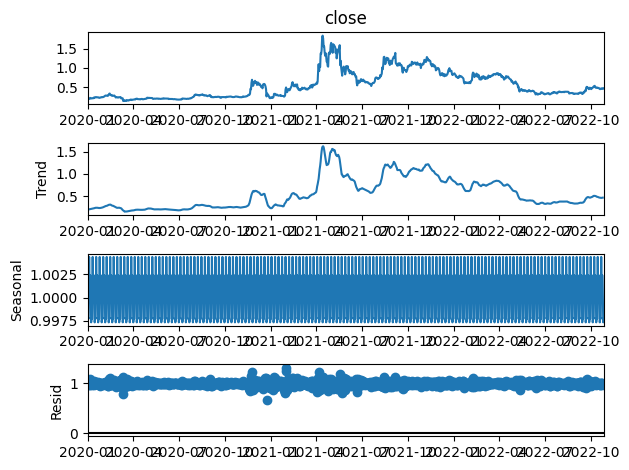

In [144]:
# the below doesnt show any trend to report on and seasonlity is also not clearly present
res.plot();

### ill return these in a function to plot on the dashboard

In [145]:
res.trend

Date
2020-01-01         NaN
2020-01-02         NaN
2020-01-03         NaN
2020-01-04    0.199936
2020-01-05    0.202273
                ...   
2022-10-24    0.463250
2022-10-25    0.464583
2022-10-26         NaN
2022-10-27         NaN
2022-10-28         NaN
Name: trend, Length: 1032, dtype: float64

In [146]:
res.seasonal

Date
2020-01-01    0.997322
2020-01-02    0.997826
2020-01-03    0.997713
2020-01-04    1.004389
2020-01-05    0.999466
                ...   
2022-10-24    1.002419
2022-10-25    1.000865
2022-10-26    0.997322
2022-10-27    0.997826
2022-10-28    0.997713
Name: seasonal, Length: 1032, dtype: float64

In [147]:
res.resid

Date
2020-01-01         NaN
2020-01-02         NaN
2020-01-03         NaN
2020-01-04    0.967840
2020-01-05    0.967216
                ...   
2022-10-24    0.977283
2022-10-25    0.992601
2022-10-26         NaN
2022-10-27         NaN
2022-10-28         NaN
Name: resid, Length: 1032, dtype: float64

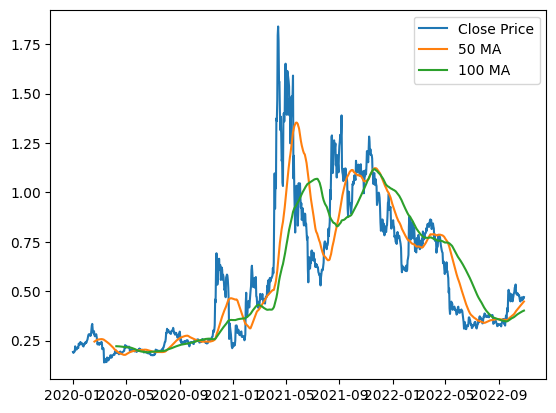

In [164]:
#overall price movement with 50 day moving average
plt.plot(df.close,label='Close Price')
plt.plot(df.close.rolling(50).mean(),label='50 MA')
plt.plot(df.close.rolling(100).mean(),label ='100 MA')
plt.legend()

In [209]:
df['close_50_ma']= df.close.rolling(50).mean()
df['close_100_ma']= df.close.rolling(100).mean()

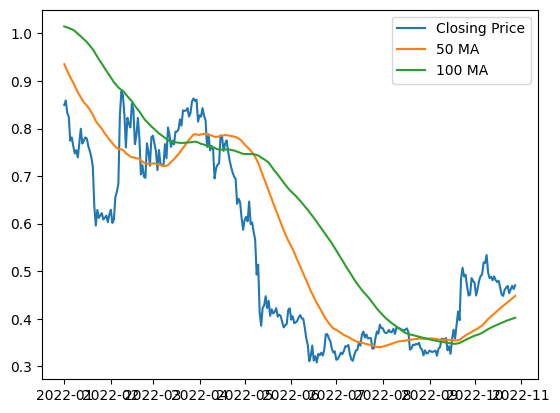

In [166]:
plt.plot(df[df.year==2022].close)
plt.plot(df[df.year==2022].close_50_ma)
plt.plot(df[df.year==2022].close_100_ma)
plt.legend(['Closing Price','50 MA','100 MA'])

I'll track the percent change from day to day

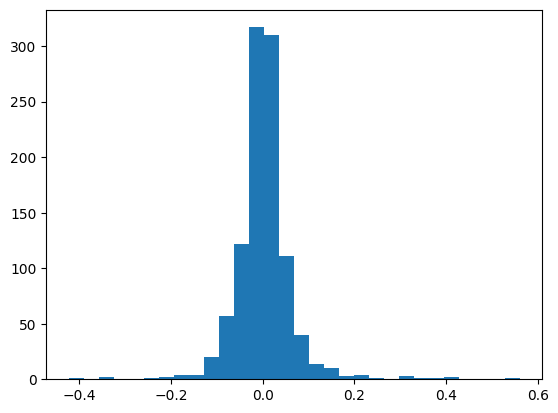

In [177]:
df['close_pct_change'] = df.close.pct_change()
plt.hist(df.close_pct_change,bins=30,)
plt.show()

In [189]:
import seaborn as sns

<Figure size 1200x1200 with 0 Axes>

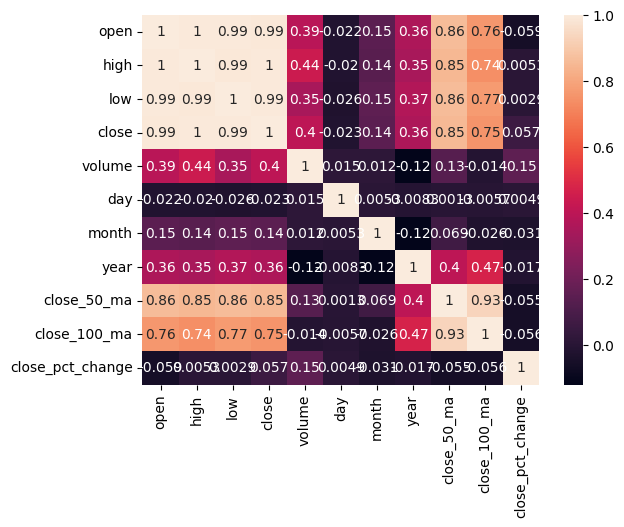

<Figure size 1200x1200 with 0 Axes>

In [193]:
sns.heatmap(df.corr(),annot=True)
plt.figure(figsize=[12,12])

#### First we'll test for stationarity using the Dickey Fuller from statsmodels
- if p<0.5:
    - Data is Stationary 
- elif p>0.5 :
    - Data is Not Stationary
- else:
    - idk

In [151]:
#the data is stationary so ill continue to modeling
from statsmodels.tsa.stattools import adfuller

def adf_test(df):
     dftest = adfuller(df, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\n",key, ": ", val)
        
adf_test(df.close)

1. ADF :  -2.3259200165485905
2. P-Value :  0.16374445868768162
3. Num Of Lags :  21
4. Num Of Observations Used For ADF Regression: 1010
5. Critical Values :

 1% :  -3.436841086801818

 5% :  -2.8644058726042196

 10% :  -2.5682959219684345


In [130]:
# we'll use 3 models linear regression, ARIMA, and a NN

### linear regression

In [221]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing

from sklearn.metrics import r2_score, mean_squared_error

In [202]:
df.reset_index(drop=True)

,open,high,low,close,volume,test_date,day,month,year,close_50_ma,close_100_ma,close_pct_change
0,0.192912,0.194362,0.192107,0.192667,1041134003,2020-01-01,1,1,2020,NaN,NaN,NaN
1,0.192708,0.192896,0.186947,0.188043,1085351426,2020-01-02,2,1,2020,NaN,NaN,-0.024000
2,0.187948,0.194070,0.185846,0.193521,1270017043,2020-01-03,3,1,2020,NaN,NaN,0.029132
3,0.193521,0.194653,0.191835,0.194355,999331594,2020-01-04,4,1,2020,NaN,NaN,0.004310
4,0.194367,0.199223,0.193884,0.195537,1168067557,2020-01-05,5,1,2020,NaN,NaN,0.006082
...,...,...,...,...,...,...,...,...,...,...,...,...
1027,0.469037,0.470982,0.449691,0.453821,1293537737,2022-10-24,24,10,2022,0.437494,0.397843,-0.032433
1028,0.453807,0.471014,0.445384,0.461544,1605966218,2022-10-25,25,10,2022,0.440066,0.399025,0.017018
1029,0.461466,0.470251,0.458092,0.469376,1440473976,2022-10-26,26,10,2022,0.443009,0.400057,0.016969
1030,0.469395,0.480456,0.460977,0.462407,1694861069,2022-10-27,27,10,2022,0.445510,0.400949,-0.014847


In [215]:
df = df.drop(columns=['adj close','test_date'])

KeyError: "['adj close', 'test_date'] not found in axis"

In [217]:
df.fillna(0,inplace=True)

In [218]:
# Train test splitting
y = df.close.reset_index(drop=True) 
x = df.drop(columns=['close']).reset_index(drop=True)

In [231]:
# Since this data has a time feature Im want to keep it in order
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.15,shuffle=False)

In [232]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [233]:
lin_reg.intercept_

1.3849680969363773

In [234]:
lin_reg.coef_

array([-5.19289687e-01,  8.42177817e-01,  6.65540559e-01, -1.80633286e-13,
       -1.56123787e-05, -2.42247695e-05, -6.85067929e-04,  4.72603799e-03,
        2.68567104e-03])

In [238]:
lin_reg_preds = lin_reg.predict(x_test)

In [245]:
perf_df = pd.DataFrame([lin_reg_preds,y_test]).transpose()
perf_df.columns = ['preds','actual']

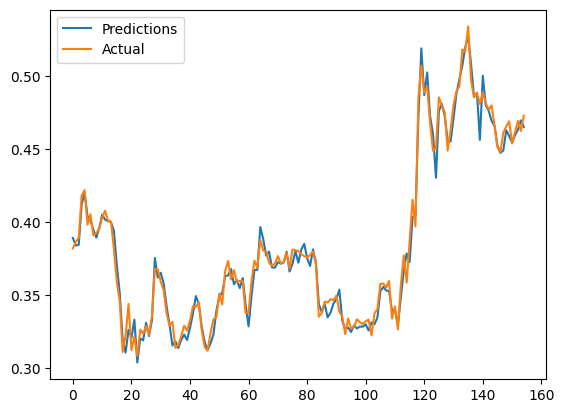

In [246]:
plt.plot(perf_df.preds)
plt.plot(perf_df.actual)
plt.legend(['Predictions','Actual'])

### ARIMA MODELING

In [247]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [249]:
y_sari = df.close

In [ ]:
SARIMAX(y_sari,order=())